# Submission

Send the file `cs231nHD/neural_net.py` and the `Exercise 08.ipynb` ipython notebook to [carsten.haubold@iwr.uni-heidelberg.de](mailto:carsten.haubold@iwr.uni-heidelberg.de). Use "**[BMIA] Exercise 08**" as subject line. Make sure to mention all names in every solution you hand in as a group (in source code and email to prevent confusion). **The deadline is in two weeks: Tuesday, 28st of June 2016, 2pm, right before the lecture.**

## Note

We have included the ipython notebook sections of the last exercise in here so that whenever you change your neural_net implementation you can check whether it still works properly. The actual task starts further down at the section **Debug the training**.

# Done: Implementing a Neural Network

In the last exercise we developed a neural network with two fully-connected layers to perform classification, and tested it out on the MNIST dataset.

** Credits: ** We have based this exercise on an assignment of the very good course on Neural Networks from the Stanford University [http://cs231n.github.io/](http://cs231n.github.io/), but adjusted it a bit to use a smaller dataset (MNIST instead of CIFAR-10), and to work with Python 3.

** How to solve this exercise: ** You will have to work with both, the source file `neural_net.py`, and this ipython notebook. This notebook allows you to verify your implementation of a neural net through predefined test cases. The source file `neural_net.py` contains a skeleton implementation with a lot of comments to show you what you are expected to do. Special blocks of **TODOs** indicate where you are supposed to add the implementation, and what to do there. The methods of the neural net you write in the separate file will be reloaded automatically whenever you save the `neural_net.py` file. The class `TwoLayerNet` is imported from this file as below.

In [5]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

from cs231nHD.neural_net_solution import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

**Hint:** If you need more information on classes and object oriented programming, check out the great tutorial at [http://www.python-course.eu/python3_object_oriented_programming.php](http://www.python-course.eu/python3_object_oriented_programming.php)

In [6]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments!

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Done: Forward pass: compute scores
Open the file `cs231n/neural_net.py` and look at the method `TwoLayerNet.loss`. This function takes the data and weights and should compute the class scores, the loss, and the gradients on the parameters.

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. Then run the cell below to see whether you have computed the right thing.

In [7]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027209818e-08


# Done: Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss. For the data loss, use the average cross-entropy softmax loss.

In [8]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss {} and correct loss {}:'.format(
        loss, correct_loss))
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss 1.3037878913298206 and correct loss 1.30378789133:
1.79412040779e-13


# Done: Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [9]:
from cs231nHD.gradient_check import eval_numerical_gradient

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 3.865038766736349e-11
W2 max relative error: 3.440707836450643e-09
W1 max relative error: 3.6698575691961915e-09
b1 max relative error: 1.1254228352836888e-09


# Done: Train the network
To train the network we will use stochastic gradient descent (SGD). Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

In [10]:
net = init_toy_model()

Final training loss:  0.0156349876119


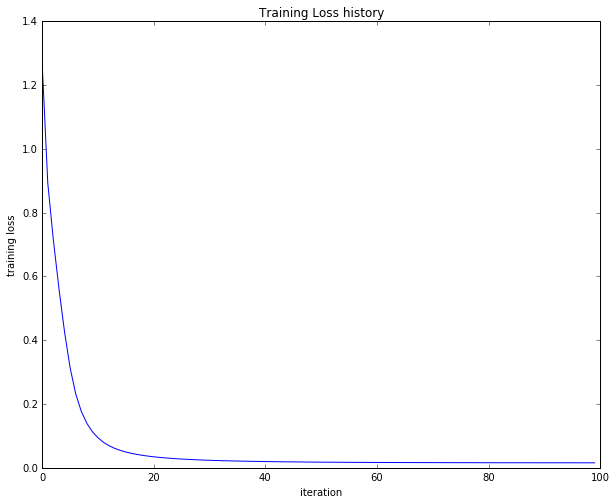

In [11]:
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Done: Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up the MNIST dataset from [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) so we can use it to train a classifier on a real dataset. The `load_mnist()` method downloads the data (~11MB) automatically if it is not present yet!

Each data point is now a `28 * 28` grayscale image of a digit, reshaped into a vector.

In [12]:
from cs231nHD.data_utils import load_mnist

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Classes: ', np.unique(y_test), ', number of classes is ', len(np.unique(y_test)))

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)
Classes:  [0 1 2 3 4 5 6 7 8 9] , number of classes is  10


Image Class:  7


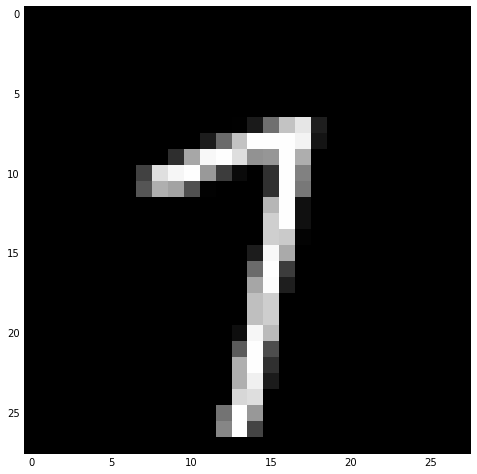

In [13]:
# show one of the images
plt.imshow(np.reshape(X_train[42,:], [28,28]))
print("Image Class: ", y_train[42])

# Done: Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [14]:
import time

input_size = 28 * 28 * 1
num_classes = 10
hidden_size = 10
net = TwoLayerNet(input_size, hidden_size, num_classes, std=1e-5)

start_time = time.clock()

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=0.05, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

end_time = time.clock()
print("Training took ", end_time - start_time, " seconds")

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.3025851331467933
iteration 100 / 1000: loss 2.300208053890855
iteration 200 / 1000: loss 2.3006279347045675
iteration 300 / 1000: loss 2.3023429060046428
iteration 400 / 1000: loss 2.298888670126768
iteration 500 / 1000: loss 2.2914495656469307
iteration 600 / 1000: loss 2.136753778322669
iteration 700 / 1000: loss 1.9239448836848372
iteration 800 / 1000: loss 1.8382692178607627
iteration 900 / 1000: loss 1.701311638205852
Training took  9.644853130282701  seconds
Validation accuracy:  0.6564


# Debug the training
With the default parameters we provided above, we got a validation accuracy of about 0.75 on the validation set. This isn't very good. In **this** exercise we will look at ways to improve performance.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

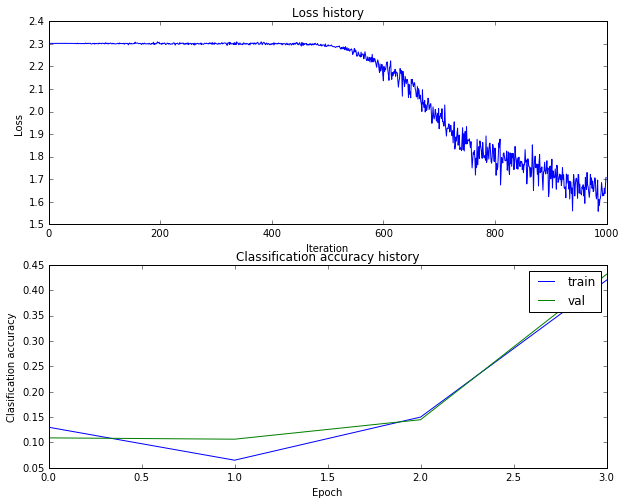

In [15]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

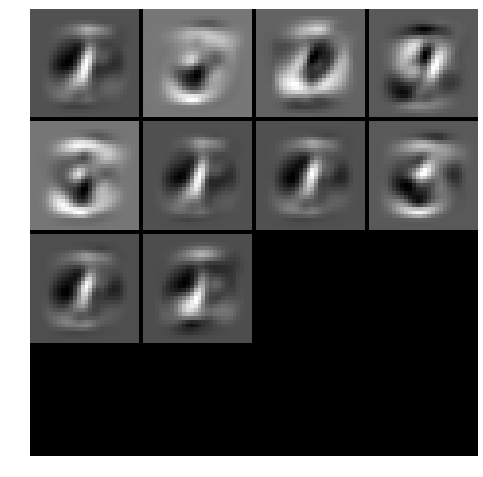

In [16]:
from cs231nHD.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(28, 28, 1, -1).transpose(3, 0, 1, 2)
    img = visualize_grid(W1, padding=1).astype('uint8')
    plt.imshow(img[:,:,0])
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Start here:  Tune your hyperparameters (12 points)

**What's wrong?**. Looking at the visualizations above, we see that the loss only decreases at the beginning and then doesn't improve any more, which seems to suggest that the learning rate may be too low, or that the regularization is too high. Moreover, the training accurracy does not reach very high values, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be able to achieve a classification accuracy of greater than 90% on the validation set. Our best 2-layer network gets over 97% on the validation set.

**Experiment**: Your goal in this exercise is to get as good of a result on MNIST as you can, with a fully-connected Neural Network. For every 1% above 94% on the test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. implementing the ADAM solver, changing the weight initialization, adding dropout, etc.). Depending on what measures you want to take, it may be that you need to change code outside the TODO-blocks from the last exercises in `neural_net.py`.

**Links**:

* ADAM paper: [arxiv.org/abs/1412.6980](arxiv.org/abs/1412.6980)
* Weight initialization: [Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/pdf/1502.01852v1.pdf)

# Document your findings

In addition to putting the best configuration between the commented blocks below, please list the changes (new parameter values, etc.) you made to the default network which was the result of the last exercise. For each change you note, state the validation and test accurracy. E.g.:

* default network (`hidden_layers=10, num_iters=1000, learning_rate=0.05, reg=0.1`): validation acc: 0.76, test acc: 0.75
* best choice of parameters found by ??? (`hidden_layers=???, num_iters=???, learning_rate=???, reg=???`): validation acc: ???, test acc: ???
* implemented ADAM solver (`hidden_layers=???, num_iters=???, learning_rate=???, reg=???`): validation acc: ???, test acc: ???


In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
                
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 90%.

**We will give you one extra bonus point for every 1% of accuracy above 94%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)